In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/waste-classification-data


In [3]:
import shutil
import os

source_directory = "/kaggle/input/waste-classification-data"
destination_directory = "waste_classification_data"  # Visible directory name (relative path)

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Construct the full destination path
full_destination_path = os.path.join(destination_directory, "1") #Creates a folder called 1 inside the destination folder.

try:
    shutil.copytree(source_directory, full_destination_path)
    print(f"Directory copied to: {full_destination_path}")
except FileExistsError:
    print(f"Destination directory '{full_destination_path}' already exists.")
except FileNotFoundError:
    print(f"Source directory '{source_directory}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory copied to: waste_classification_data/1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import cv2

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from tensorflow.keras.utils import plot_model

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_path = "waste_classification_data/1/DATASET/TRAIN"
test_path = "waste_classification_data/1/DATASET/TEST"

In [8]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:03<00:00, 2631.40it/s]


In [9]:
data.shape

(22564, 2)

In [10]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

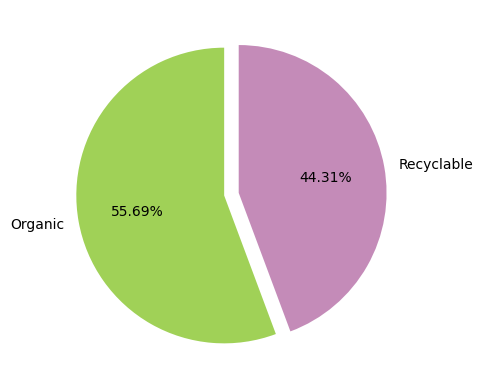

In [11]:
colors = ['#a0d157','#c48bb8']

plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=1)
plt.show()

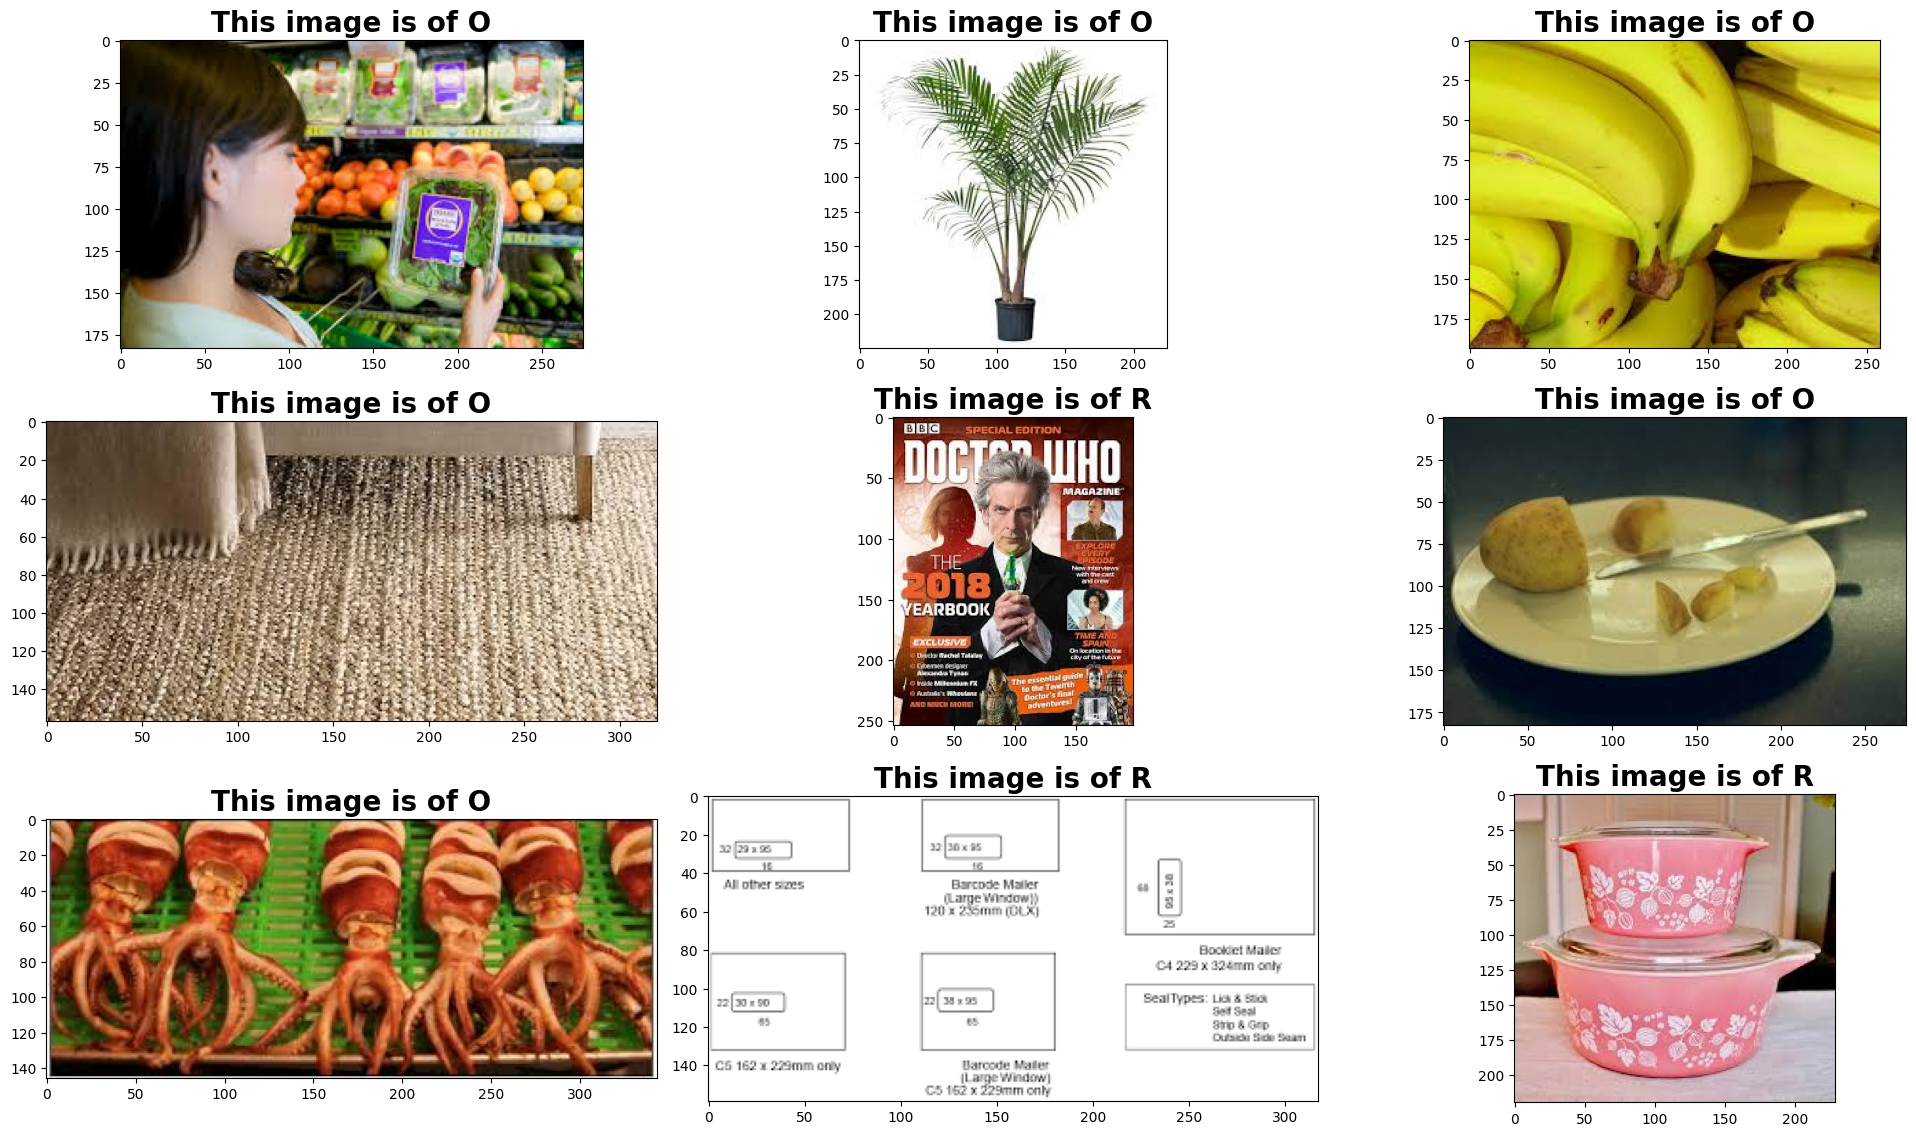

In [12]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [13]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [14]:
model = Sequential()
# Convolutional Block 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'))
# model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))  # Output layer
model.add(Activation("sigmoid"))

In [15]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,800,194 (98.42 MB)

 Trainable params: 25,800,194 (98.42 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
# Train the model
hist = model.fit(
    x=train_generator,
    epochs=12,
    validation_data = test_generator,
    callbacks = [early_stopping]  # Add Early Stopping
)

Epoch 1/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.7719 - loss: 0.5441 - val_accuracy: 0.8826 - val_loss: 0.3557
Epoch 2/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8377 - loss: 0.3930 - val_accuracy: 0.8814 - val_loss: 0.2972
Epoch 3/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.8612 - loss: 0.3458 - val_accuracy: 0.8938 - val_loss: 0.2726
Epoch 4/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8744 - loss: 0.3206 - val_accuracy: 0.8695 - val_loss: 0.3604
Epoch 5/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.8850 - loss: 0.2918 - val_accuracy: 0.8858 - val_loss: 0.3384
Epoch 6/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9031 - loss: 0.2556 - val_accuracy: 0.8810 - val_loss: 0.3566


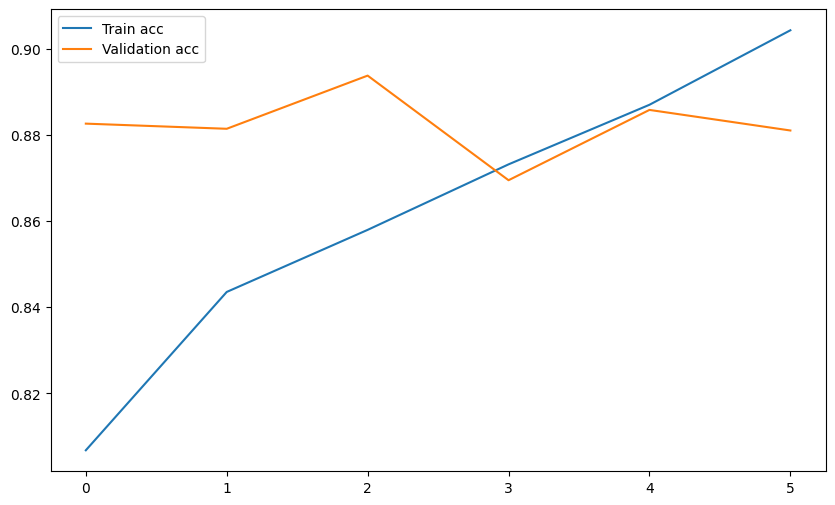

In [21]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

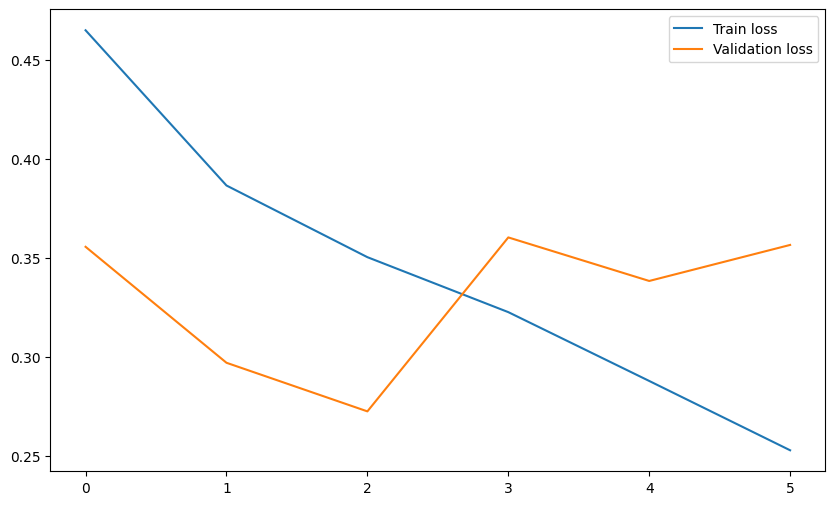

In [22]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [23]:
# After training the model, save it to a file
model.save('waste_classifier_cnn.h5')

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2 # Make sure to import cv2

# Path to the trained model and test image
model_path = 'waste_classifier_cnn.h5'
test_img = r"/content/org.jpeg"  # Store the path as a string
#test_img = cv2.imread("DATASET/TEST/O/O_12573.jpg")

In [25]:
# Load the trained model
model = tf.keras.models.load_model(model_path)

In [26]:
def predict_func(img_path):  # Update function to accept image path
    img = cv2.imread(img_path)  # Read the image using cv2.imread
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Now img is a NumPy array
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
This image -> Organic


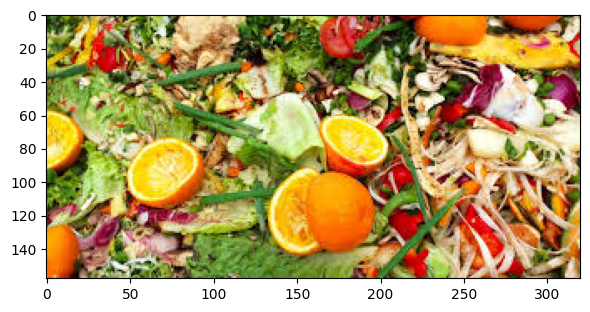

In [27]:
# Call predict_func with the image path
predict_func(test_img)